In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm

# Create dataset --- x1 and x2 have the same variance

In [56]:
###### Create the original dataset
n = 600 # total number of data points
x = np.random.rand(n)

# In this case the 
sigma_f1 = 0.1
sigma_f2 = 0.1
sigma_noise = 0.01

p = np.array([0.9, 0.1])

x1 = x + np.random.normal(0,sigma_f1,x.shape[0]) # x1 feature 
x2 = x + np.random.normal(0,sigma_f2,x.shape[0]) # x2 feature 

x1 = x1.reshape((x1.shape[0],1))
x2 = x2.reshape((x2.shape[0],1))
X = np.concatenate((x1,x2),axis=1)

w = np.array([0.5,0.5])

y = np.dot(X,w) + np.random.normal(0,sigma_noise,X.shape[0])

In [57]:
#### separate/modify for training and testing data
X_tr_un = np.array(X[0:n/2,:])
y_tr = np.array(y[0:n/2])
X_te_un = np.array(X[n/2:,:])
y_te = np.array(y[n/2:])

X_tr_mo = np.array(X[0:n/2,:])
num = X_tr_mo.shape[0] - (p*X_tr_mo.shape[0]).astype('int32')
for i in range(num.shape[0]):
    perm = np.random.permutation(X_tr_mo.shape[0])[0:num[i]]
    X_tr_mo[perm, i] = 0
X_te_mo = np.array(X[n/2:,:])
num2 = X_te_mo.shape[0] - (p*X_te_mo.shape[0]).astype('int32')
for i in range(num2.shape[0]):
    perm = np.random.permutation(X_te_mo.shape[0])[0:num2[i]]
    X_te_mo[perm,i] = 0

In [191]:
#lam = np.logspace(-3,6,10)
lam = np.linspace(50,149,100)

In [192]:
lam

array([  50.,   51.,   52.,   53.,   54.,   55.,   56.,   57.,   58.,
         59.,   60.,   61.,   62.,   63.,   64.,   65.,   66.,   67.,
         68.,   69.,   70.,   71.,   72.,   73.,   74.,   75.,   76.,
         77.,   78.,   79.,   80.,   81.,   82.,   83.,   84.,   85.,
         86.,   87.,   88.,   89.,   90.,   91.,   92.,   93.,   94.,
         95.,   96.,   97.,   98.,   99.,  100.,  101.,  102.,  103.,
        104.,  105.,  106.,  107.,  108.,  109.,  110.,  111.,  112.,
        113.,  114.,  115.,  116.,  117.,  118.,  119.,  120.,  121.,
        122.,  123.,  124.,  125.,  126.,  127.,  128.,  129.,  130.,
        131.,  132.,  133.,  134.,  135.,  136.,  137.,  138.,  139.,
        140.,  141.,  142.,  143.,  144.,  145.,  146.,  147.,  148.,  149.])

# Exp1:  vanilla ridge regression on unmodified X_tr_un

In [76]:
w_r1 = np.zeros((lam.shape[0],X_tr_un.shape[1]))
for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(X_tr_un.T,X_tr_un)+lam[i]*np.eye(X_tr_un.shape[1]))
    w_r1[i] = np.dot(np.dot(inv,X_tr_un.T),y_tr)

In [80]:
# error 
error1 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r1[i]) - y_te
    error1[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error1

array([ 0.09229393,  0.09229567,  0.09231438,  0.09259739,  0.09752798,
        0.14490896,  0.27509075,  0.32587909,  0.33236909,  0.33303592])

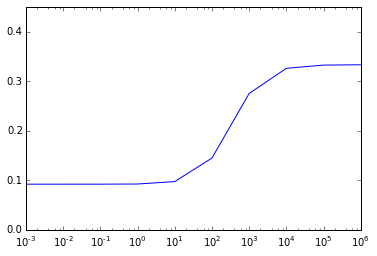

In [84]:
fig, ax = plt.subplots()
ax.plot(lam, error1, label= 'exp1')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp2: vanilla ridge regression on modified X_tr_mo

In [85]:
w_r2 = np.zeros((lam.shape[0],X_tr_mo.shape[1]))
for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(X_tr_mo.T,X_tr_mo)+lam[i]*np.eye(X_tr_mo.shape[1]))
    w_r2[i] = np.dot(np.dot(inv,X_tr_mo.T),y_tr)

In [91]:
# error 
error2 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r2[i]) - y_te
    error2[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error2

array([ 0.03148441,  0.03148357,  0.0314756 ,  0.03143688,  0.03382667,
        0.10890652,  0.28203259,  0.3273313 ,  0.33252475,  0.33305159])

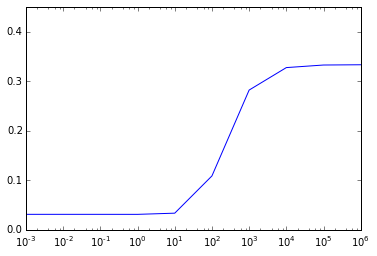

In [92]:
fig, ax = plt.subplots()
ax.plot(lam, error2, label= 'exp2')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp3: anytime with L2 on X_tr_un

In [93]:
w_r3 = np.zeros((lam.shape[0],X_tr_un.shape[1]))

dp = np.diag(p) #B
dpp = np.diag(p-1.0/2*p*p)
xp = np.dot(X_tr_un,dp)

for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(np.dot(X_tr_un.T,X_tr_un),dpp) + 1.0/2*np.dot(xp.T,xp)+lam[i]*np.eye(X_tr_un.shape[1]))
    w_r3[i] = np.dot(np.dot(inv,xp.T),y_tr)

In [96]:
# error 
error3 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r3[i]) - y_te
    error3[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error3

array([ 17.16767995,  17.01132584,  15.55762982,   7.50227609,
         0.43282199,   0.11429753,   0.28169152,   0.32725301,
         0.33251635,   0.33305075])

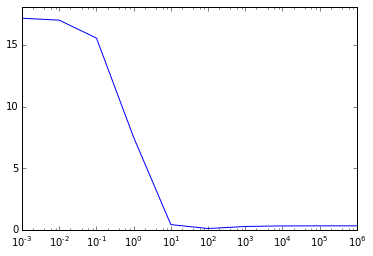

In [97]:
fig, ax = plt.subplots()
ax.plot(lam, error3, label= 'exp3')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp4: vanilla lasso on unmodified X_tr_un

In [98]:
w_r4 = np.zeros((lam.shape[0],X_tr_un.shape[1]))
y_pred = np.zeros((lam.shape[0],X_te_mo.shape[0]))
for i in range(lam.shape[0]):
    clf = lm.Lasso(alpha=lam[0])
    clf.fit(X_tr_un,y_tr)
    y_pred[i] = clf.predict(X_te_mo)
    w_r4[i] = clf.coef_


In [99]:
# error 
error4 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = y_pred[i] - y_te
    error4[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error4

array([ 0.18991344,  0.2269521 ,  0.11079067,  0.34749243,  0.13991235,
        0.24301307,  0.14800655,  0.2305421 ,  0.25007315,  0.19356685])

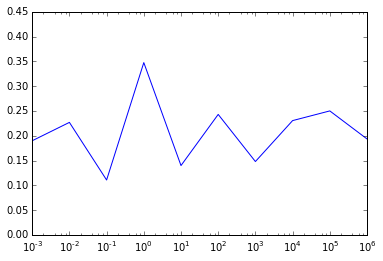

In [100]:
fig, ax = plt.subplots()
ax.plot(lam, error4, label= 'exp4')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp5: vanilla lasso on modified X_tr_mo

In [101]:
w_r5 = np.zeros((lam.shape[0],X_tr_mo.shape[1]))
y_pred5 = np.zeros((lam.shape[0],X_te_mo.shape[0]))
for i in range(lam.shape[0]):
    clf = lm.Lasso(alpha=lam[0])
    clf.fit(X_tr_mo,y_tr)
    y_pred5[i] = clf.predict(X_te_mo)
    w_r5[i] = clf.coef_

In [102]:
# error 
error5 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = y_pred5[i] - y_te
    error5[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error5

array([ 0.02510654,  0.02510654,  0.02510654,  0.02510654,  0.02510654,
        0.02510654,  0.02510654,  0.02510654,  0.02510654,  0.02510654])

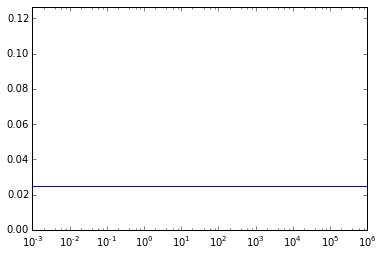

In [103]:
fig, ax = plt.subplots()
ax.plot(lam, error5, label= 'exp5')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp6: anytime with L1 on unmodified X_tr_un

In [109]:
w_r6 = np.zeros((lam.shape[0],X_tr_un.shape[1]))

dp = np.diag(p) #B
dpp = np.diag(p-1.0/2*p*p)
xp = np.dot(X_tr_un,dp)

for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(np.dot(X_tr_un.T,X_tr_un),dpp) + 1.0/2*np.dot(xp.T,xp))
    w_r6[i] = np.dot(np.dot(inv,xp.T),y_tr)

for i in range(w_r6.shape[0]):
    for j in range(w_r6.shape[1]):
        it = w_r6[i,j]
        if it > lam[i]:
            it -= lam[i]
        elif it <= lam[i] and it >= -lam[i]:
            it = 0
        elif it < -lam[i]:
            it += lam[i]
        w_r6[i,j] = it
w_r6

array([[  4.06949921, -20.5681752 ],
       [  4.06049921, -20.5591752 ],
       [  3.97049921, -20.4691752 ],
       [  3.07049921, -19.5691752 ],
       [  0.        , -10.5691752 ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [110]:
# error 
error6 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r6[i]) - y_te
    error6[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error6

array([ 17.18328663,  17.16623341,  16.99817727,  15.56522148,
         6.30305704,   0.33311022,   0.33311022,   0.33311022,
         0.33311022,   0.33311022])

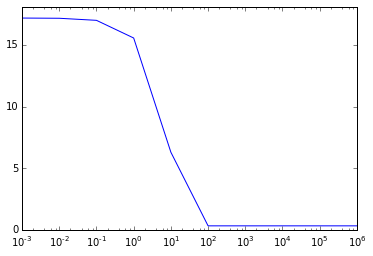

In [111]:
fig, ax = plt.subplots()
ax.plot(lam, error6, label= 'exp6')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Create dataset --- x1 and x2 have difference variance

In [212]:
###### Create the original dataset
n = 600 # total number of data points
#x = np.random.rand(n) # to keep the same expectation of the original dataset

# In this case 
sigma_f1 = 1
sigma_f2 = 0.01
sigma_noise = 0.01

p = np.array([0.9, 0.1])

x1 = x + np.random.normal(0,sigma_f1,x.shape[0]) # x1 feature 
x2 = x + np.random.normal(0,sigma_f2,x.shape[0]) # x2 feature 

x1 = x1.reshape((x1.shape[0],1))
x2 = x2.reshape((x2.shape[0],1))
X = np.concatenate((x1,x2),axis=1)

w = np.array([0.3,0.7])

y = np.dot(X,w) + np.random.normal(0,sigma_noise,X.shape[0])

In [213]:
#### separate/modify for training and testing data
X_tr_un = np.array(X[0:n/2,:])
y_tr = np.array(y[0:n/2])
X_te_un = np.array(X[n/2:,:])
y_te = np.array(y[n/2:])

X_tr_mo = np.array(X[0:n/2,:])
num = X_tr_mo.shape[0] - (p*X_tr_mo.shape[0]).astype('int32')
for i in range(num.shape[0]):
    perm = np.random.permutation(X_tr_mo.shape[0])[0:num[i]]
    X_tr_mo[perm, i] = 0
X_te_mo = np.array(X[n/2:,:])
num2 = X_te_mo.shape[0] - (p*X_te_mo.shape[0]).astype('int32')
for i in range(num2.shape[0]):
    perm = np.random.permutation(X_te_mo.shape[0])[0:num2[i]]
    X_te_mo[perm,i] = 0

# Exp7:  vanilla ridge regression on unmodified X_tr_un

In [214]:
w_r7 = np.zeros((lam.shape[0],X_tr_un.shape[1]))
for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(X_tr_un.T,X_tr_un)+lam[i]*np.eye(X_tr_un.shape[1]))
    w_r7[i] = np.dot(np.dot(inv,X_tr_un.T),y_tr)

In [215]:
w_r7

array([[ 0.3174011 ,  0.4646436 ],
       [ 0.31734019,  0.46171849],
       [ 0.31727084,  0.45883574],
       [ 0.31719328,  0.45599438],
       [ 0.31710777,  0.4531935 ],
       [ 0.31701452,  0.45043219],
       [ 0.31691377,  0.44770958],
       [ 0.31680574,  0.44502483],
       [ 0.31669063,  0.44237712],
       [ 0.31656865,  0.43976565],
       [ 0.31644001,  0.43718964],
       [ 0.31630489,  0.43464836],
       [ 0.31616348,  0.43214105],
       [ 0.31601596,  0.42966702],
       [ 0.31586251,  0.42722557],
       [ 0.31570329,  0.42481604],
       [ 0.31553848,  0.42243777],
       [ 0.31536823,  0.42009013],
       [ 0.3151927 ,  0.4177725 ],
       [ 0.31501204,  0.41548428],
       [ 0.31482639,  0.41322489],
       [ 0.3146359 ,  0.41099376],
       [ 0.31444071,  0.40879033],
       [ 0.31424095,  0.40661406],
       [ 0.31403675,  0.40446444],
       [ 0.31382824,  0.40234095],
       [ 0.31361554,  0.40024309],
       [ 0.31339878,  0.39817037],
       [ 0.31317806,

In [216]:
# error 
error7 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r7[i]) - y_te
    error7[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error7

array([ 0.17017653,  0.17024155,  0.17030973,  0.17038096,  0.17045516,
        0.17053224,  0.17061212,  0.17069471,  0.17077993,  0.17086772,
        0.17095798,  0.17105067,  0.1711457 ,  0.17124301,  0.17134254,
        0.17144422,  0.17154801,  0.17165383,  0.17176164,  0.17187138,
        0.171983  ,  0.17209646,  0.17221169,  0.17232866,  0.17244732,
        0.17256762,  0.17268953,  0.172813  ,  0.172938  ,  0.17306447,
        0.1731924 ,  0.17332173,  0.17345243,  0.17358448,  0.17371783,
        0.17385246,  0.17398833,  0.17412541,  0.17426367,  0.17440309,
        0.17454363,  0.17468527,  0.17482798,  0.17497174,  0.17511652,
        0.17526229,  0.17540904,  0.17555673,  0.17570535,  0.17585488,
        0.17600529,  0.17615656,  0.17630867,  0.1764616 ,  0.17661534,
        0.17676986,  0.17692514,  0.17708117,  0.17723793,  0.1773954 ,
        0.17755357,  0.17771241,  0.17787192,  0.17803207,  0.17819286,
        0.17835426,  0.17851627,  0.17867887,  0.17884203,  0.17

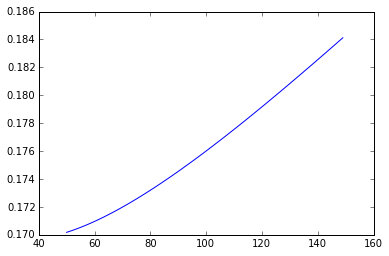

In [217]:
fig, ax = plt.subplots()
ax.plot(lam, error7, label= 'exp7')
#ax.set_ylim([0,ax.get_ylim()[1]+0.1])
#ax.set_xscale('log')
plt.show()

# Exp8: vanilla ridge regression on modified X_tr_mo

In [122]:
w_r8 = np.zeros((lam.shape[0],X_tr_mo.shape[1]))
for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(X_tr_mo.T,X_tr_mo)+lam[i]*np.eye(X_tr_mo.shape[1]))
    w_r8[i] = np.dot(np.dot(inv,X_tr_mo.T),y_tr)
w_r8

array([[  4.51977549e-01,   5.57791428e-01],
       [  4.51982272e-01,   5.57373034e-01],
       [  4.52028207e-01,   5.53224410e-01],
       [  4.52368242e-01,   5.14989887e-01],
       [  4.49473303e-01,   3.07558015e-01],
       [  3.73242934e-01,   7.03154153e-02],
       [  1.31620725e-01,   1.11544837e-02],
       [  1.75869612e-02,   1.28809879e-03],
       [  1.81984855e-03,   1.31171888e-04],
       [  1.82619821e-04,   1.31416899e-05]])

In [123]:
# error 
error8 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r8[i]) - y_te
    error8[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error8

array([ 0.13077346,  0.1307752 ,  0.13079312,  0.13101163,  0.13405361,
        0.15348238,  0.28273401,  0.38817741,  0.40502281,  0.40680359])

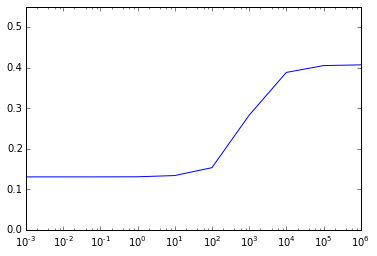

In [125]:
fig, ax = plt.subplots()
ax.plot(lam, error8, label= 'exp8')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp9: anytime with L2 on X_tr_un

In [218]:
w_r9 = np.zeros((lam.shape[0],X_tr_un.shape[1]))

dp = np.diag(p) #B
dpp = np.diag(p-1.0/2*p*p)
xp = np.dot(X_tr_un,dp)

for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(np.dot(X_tr_un.T,X_tr_un),dpp) + 1.0/2*np.dot(xp.T,xp)+lam[i]*np.eye(X_tr_un.shape[1]))
    w_r9[i] = np.dot(np.dot(inv,xp.T),y_tr)
w_r9

array([[ 0.41467225, -0.19313535],
       [ 0.41359173, -0.18906524],
       [ 0.41252052, -0.18513312],
       [ 0.41145834, -0.18133225],
       [ 0.41040493, -0.17765633],
       [ 0.40936005, -0.17409942],
       [ 0.40832345, -0.17065599],
       [ 0.40729494, -0.16732083],
       [ 0.40627429, -0.16408903],
       [ 0.40526131, -0.160956  ],
       [ 0.40425582, -0.15791739],
       [ 0.40325763, -0.15496912],
       [ 0.40226658, -0.15210732],
       [ 0.40128252, -0.14932836],
       [ 0.40030527, -0.14662879],
       [ 0.39933472, -0.14400537],
       [ 0.3983707 , -0.141455  ],
       [ 0.39741309, -0.13897478],
       [ 0.39646177, -0.13656195],
       [ 0.39551661, -0.13421387],
       [ 0.3945775 , -0.13192807],
       [ 0.39364432, -0.12970217],
       [ 0.39271697, -0.12753394],
       [ 0.39179534, -0.12542124],
       [ 0.39087934, -0.12336204],
       [ 0.38996888, -0.12135441],
       [ 0.38906385, -0.11939649],
       [ 0.38816418, -0.11748654],
       [ 0.38726978,

In [219]:
# error 
error9 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r9[i]) - y_te
    error9[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error9

array([ 0.16464435,  0.16464397,  0.16465215,  0.16466844,  0.16469245,
        0.1647238 ,  0.16476212,  0.16480709,  0.16485839,  0.16491574,
        0.16497886,  0.1650475 ,  0.16512142,  0.16520038,  0.16528419,
        0.16537263,  0.16546551,  0.16556267,  0.16566392,  0.1657691 ,
        0.16587807,  0.16599068,  0.16610679,  0.16622627,  0.166349  ,
        0.16647486,  0.16660374,  0.16673554,  0.16687014,  0.16700745,
        0.16714738,  0.16728984,  0.16743475,  0.16758202,  0.16773157,
        0.16788334,  0.16803724,  0.16819322,  0.1683512 ,  0.16851112,
        0.16867292,  0.16883655,  0.16900194,  0.16916904,  0.1693378 ,
        0.16950816,  0.16968009,  0.16985353,  0.17002844,  0.17020477,
        0.17038248,  0.17056154,  0.17074189,  0.17092351,  0.17110636,
        0.1712904 ,  0.17147559,  0.17166191,  0.17184931,  0.17203778,
        0.17222728,  0.17241777,  0.17260924,  0.17280165,  0.17299497,
        0.17318918,  0.17338426,  0.17358018,  0.17377691,  0.17

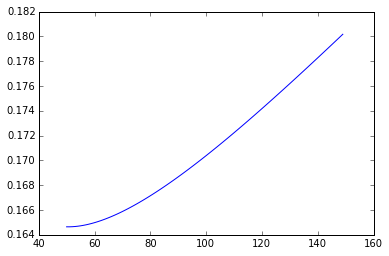

In [220]:
fig, ax = plt.subplots()
ax.plot(lam, error9, label= 'exp9')
#ax.set_ylim([0,ax.get_ylim()[1]+0.1])
#ax.set_xscale('log')
plt.show()

# Exp10: vanilla lasso on unmodified X_tr_un

In [130]:
w_r10 = np.zeros((lam.shape[0],X_tr_un.shape[1]))
y_pred = np.zeros((lam.shape[0],X_te_mo.shape[0]))
for i in range(lam.shape[0]):
    clf = lm.Lasso(alpha=lam[0])
    clf.fit(X_tr_un,y_tr)
    y_pred[i] = clf.predict(X_te_mo)
    w_r10[i] = clf.coef_

In [135]:
w_r10

array([[ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773],
       [ 0.29945676,  0.69015773]])

In [131]:
# error 
error10 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = y_pred[i] - y_te
    error10[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error10

array([ 0.16231187,  0.16231187,  0.16231187,  0.16231187,  0.16231187,
        0.16231187,  0.16231187,  0.16231187,  0.16231187,  0.16231187])

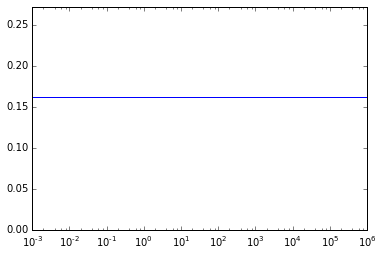

In [132]:
fig, ax = plt.subplots()
ax.plot(lam, error10, label= 'exp10')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp11: vanilla lasso on modified X_tr_mo

In [133]:
w_r11 = np.zeros((lam.shape[0],X_tr_mo.shape[1]))
y_pred11 = np.zeros((lam.shape[0],X_te_mo.shape[0]))
for i in range(lam.shape[0]):
    clf = lm.Lasso(alpha=lam[0])
    clf.fit(X_tr_mo,y_tr)
    y_pred11[i] = clf.predict(X_te_mo)
    w_r11[i] = clf.coef_

In [136]:
w_r11

array([[ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ],
       [ 0.33486417,  0.1770723 ]])

In [137]:
# error 
error11 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = y_pred11[i] - y_te
    error11[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error11

array([ 0.05020391,  0.05020391,  0.05020391,  0.05020391,  0.05020391,
        0.05020391,  0.05020391,  0.05020391,  0.05020391,  0.05020391])

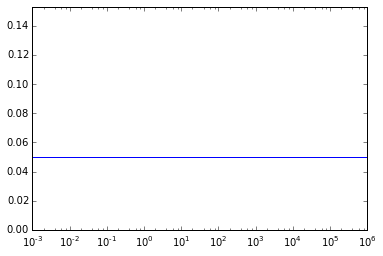

In [138]:
fig, ax = plt.subplots()
ax.plot(lam, error11, label= 'exp11')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# Exp12: anytime with L1 on unmodified X_tr_un

In [139]:
w_r12 = np.zeros((lam.shape[0],X_tr_un.shape[1]))

dp = np.diag(p) #B
dpp = np.diag(p-1.0/2*p*p)
xp = np.dot(X_tr_un,dp)

for i in range(lam.shape[0]):
    inv = np.linalg.inv(np.dot(np.dot(X_tr_un.T,X_tr_un),dpp) + 1.0/2*np.dot(xp.T,xp))
    w_r12[i] = np.dot(np.dot(inv,xp.T),y_tr)

for i in range(w_r12.shape[0]):
    for j in range(w_r12.shape[1]):
        it = w_r12[i,j]
        if it > lam[i]:
            it -= lam[i]
        elif it <= lam[i] and it >= -lam[i]:
            it = 0
        elif it < -lam[i]:
            it += lam[i]
        w_r12[i,j] = it
w_r12

array([[ 0.54046083, -1.87317284],
       [ 0.53146083, -1.86417284],
       [ 0.44146083, -1.77417284],
       [ 0.        , -0.87417284],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [140]:
# error 
error12 = np.zeros(lam.shape[0])
for i in range(lam.shape[0]):
    dif = np.dot(X_te_mo, w_r12[i]) - y_te
    error12[i] = 1.0/X_te_mo.shape[0]*np.sum(np.power(dif,2))
error12

array([ 0.31494048,  0.31331458,  0.30687426,  0.47817359,  0.40700259,
        0.40700259,  0.40700259,  0.40700259,  0.40700259,  0.40700259])

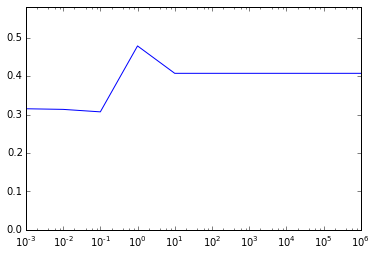

In [141]:
fig, ax = plt.subplots()
ax.plot(lam, error12, label= 'exp12')
ax.set_ylim([0,ax.get_ylim()[1]+0.1])
ax.set_xscale('log')
plt.show()

# summary

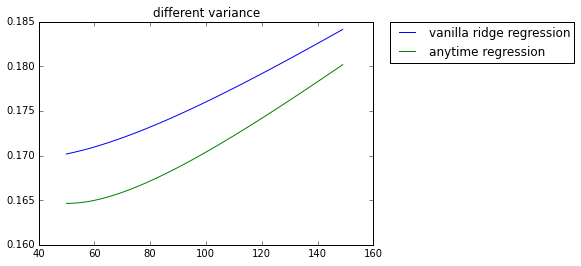

In [221]:
fig, ax = plt.subplots()
ax.plot(lam, error7, label= 'vanilla ridge regression')
#ax.plot(lam[5:], error2[5:], label= 'exp2')
ax.plot(lam, error9, label= 'anytime regression')
#ax.plot(lam, error10, label= 'exp4')
#ax.plot(lam[5:], error5[5:], label= 'exp5')
#ax.plot(lam, error12, label= 'exp6')
#ax.set_ylim([0,ax.get_ylim()[1]+0.1])
#ax.set_xscale('log')
ax.set_title('different variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()